In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from imdbpie import Imdb
imdb = Imdb()
imdb = Imdb(anonymize=True) # to proxy requests

In [3]:
top_250 = imdb.top_250()

In [4]:
# top_250 = pd.DataFrame(top_250)
# top_250.head()

In [5]:
top_250[0]

{u'can_rate': True,
 u'image': {u'height': 1388,
  u'url': u'https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_.jpg',
  u'width': 933},
 u'num_votes': 1724552,
 u'rating': 9.3,
 u'tconst': u'tt0111161',
 u'title': u'The Shawshank Redemption',
 u'type': u'feature',
 u'year': u'1994'}

In [6]:
# Get a list of top 250 movie titles
list_of_movies = []

for movie in top_250:
    list_of_movies.append(movie['tconst'])

In [7]:
list_of_movies[0:5]

[u'tt0111161', u'tt0068646', u'tt0071562', u'tt0468569', u'tt0050083']

In [8]:
# Can also get other information by using IMDBPie, but it's messy
title_test = imdb.get_title_by_id("tt0468569")

In [9]:
title_test.title

u'The Dark Knight'

In [10]:
title_test.cast_summary

[<Person: u'Christian Bale' (u'nm0000288')>,
 <Person: u'Heath Ledger' (u'nm0005132')>,
 <Person: u'Aaron Eckhart' (u'nm0001173')>,
 <Person: u'Michael Caine' (u'nm0000323')>]

In [11]:
title_test.genres

[u'Action', u'Crime', u'Drama', u'Thriller']

In [12]:
type(title_test)

imdbpie.objects.Title

### I'm going to use OMDb API instead because the other information about the movie is cleaner

I'll use the list of the top 250 movies I generated using IMDb Pie above.

In [13]:
import requests
import time
import json

In [14]:
# Test on one movie title
r = requests.get('http://www.omdbapi.com/?type=movie&t=the+shawshank+redemption')

In [15]:
r

<Response [200]>

In [16]:
r.json()

{u'Actors': u'Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
 u'Awards': u'Nominated for 7 Oscars. Another 18 wins & 30 nominations.',
 u'Country': u'USA',
 u'Director': u'Frank Darabont',
 u'Genre': u'Crime, Drama',
 u'Language': u'English',
 u'Metascore': u'80',
 u'Plot': u'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 u'Poster': u'https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_SX300.jpg',
 u'Rated': u'R',
 u'Released': u'14 Oct 1994',
 u'Response': u'True',
 u'Runtime': u'142 min',
 u'Title': u'The Shawshank Redemption',
 u'Type': u'movie',
 u'Writer': u'Stephen King (short story "Rita Hayworth and Shawshank Redemption"), Frank Darabont (screenplay)',
 u'Year': u'1994',
 u'imdbID': u'tt0111161',
 u'imdbRating': u'9.3',
 u'imdbVotes': u'1,711,064'}

In [17]:
list_of_movies[0:5]

[u'tt0111161', u'tt0068646', u'tt0071562', u'tt0468569', u'tt0050083']

In [18]:
# # After running the script in the cell below this one the first time, I discovered that OMDb API errors out if 
# # the length of the movie title is only one character. I added this little thing to the code to work around that 

# for movie in list_of_movies:
#     title = movie.replace(' ', '+')
#     if len(title) == 1:
#         title = '"'+title+'"'
#         print title

In [19]:
movies_json = []

for movie in list_of_movies:
#     title = movie.replace(' ', '+')
    
#     # Workaround for one character movies
#     if len(title) == 1:
#         title = '"'+title+'"'

    url = 'http://www.omdbapi.com/?i='+movie
    r = requests.get(url)
    movies_json.append(r.json())
    print 'Finished movie:', movie
    time.sleep(1)

Finished movie: tt0111161
Finished movie: tt0068646
Finished movie: tt0071562
Finished movie: tt0468569
Finished movie: tt0050083
Finished movie: tt0108052
Finished movie: tt0110912
Finished movie: tt0167260
Finished movie: tt0060196
Finished movie: tt0137523
Finished movie: tt0120737
Finished movie: tt0080684
Finished movie: tt0109830
Finished movie: tt1375666
Finished movie: tt0167261
Finished movie: tt0073486
Finished movie: tt0099685
Finished movie: tt0133093
Finished movie: tt0047478
Finished movie: tt0076759
Finished movie: tt0317248
Finished movie: tt0114369
Finished movie: tt0102926
Finished movie: tt0038650
Finished movie: tt0114814
Finished movie: tt0118799
Finished movie: tt0110413
Finished movie: tt0245429
Finished movie: tt0120815
Finished movie: tt0064116
Finished movie: tt0120586
Finished movie: tt0816692
Finished movie: tt0034583
Finished movie: tt0054215
Finished movie: tt0021749
Finished movie: tt0082971
Finished movie: tt0120689
Finished movie: tt1675434
Finished mov

In [88]:
len(movies_json)

250

In [89]:
movies_json[0]

{u'Actors': u'Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
 u'Awards': u'Nominated for 7 Oscars. Another 18 wins & 30 nominations.',
 u'Country': u'USA',
 u'Director': u'Frank Darabont',
 u'Genre': u'Crime, Drama',
 u'Language': u'English',
 u'Metascore': u'80',
 u'Plot': u'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 u'Poster': u'https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_SX300.jpg',
 u'Rated': u'R',
 u'Released': u'14 Oct 1994',
 u'Response': u'True',
 u'Runtime': u'142 min',
 u'Title': u'The Shawshank Redemption',
 u'Type': u'movie',
 u'Writer': u'Stephen King (short story "Rita Hayworth and Shawshank Redemption"), Frank Darabont (screenplay)',
 u'Year': u'1994',
 u'imdbID': u'tt0111161',
 u'imdbRating': u'9.3',
 u'imdbVotes': u'1,711,064'}

In [294]:
df = pd.DataFrame(movies_json)
print df.shape
df.head(2)

(250, 20)


,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,711,064"
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,True,175 min,The Godfather,movie,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,177,812"


In [295]:
df.isnull().any()

Actors        False
Awards        False
Country       False
Director      False
Genre         False
Language      False
Metascore     False
Plot          False
Poster        False
Rated         False
Released      False
Response      False
Runtime       False
Title         False
Type          False
Writer        False
Year          False
imdbID        False
imdbRating    False
imdbVotes     False
dtype: bool

In [296]:
with open('data.json', 'w') as outfile:
    json.dump(movies_json, outfile)

In [297]:
with open('data.json') as data_file:    
    data = json.load(data_file)

In [298]:
df = pd.DataFrame(data)
df.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,711,064"
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,True,175 min,The Godfather,movie,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,177,812"
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80,The early life and career of Vito Corleone in ...,https://images-na.ssl-images-amazon.com/images...,R,20 Dec 1974,True,202 min,The Godfather: Part II,movie,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,tt0071562,9.0,"807,734"
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82,When the menace known as the Joker wreaks havo...,https://images-na.ssl-images-amazon.com/images...,PG-13,18 Jul 2008,True,152 min,The Dark Knight,movie,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,tt0468569,9.0,"1,699,835"
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,N/A,A jury holdout attempts to prevent a miscarria...,https://images-na.ssl-images-amazon.com/images...,APPROVED,01 Apr 1957,True,96 min,12 Angry Men,movie,"Reginald Rose (story), Reginald Rose (screenplay)",1957,tt0050083,8.9,"455,987"


In [299]:
# Saving to csv so I don't have to generate data again
df.to_csv('dirty_data.csv', encoding='utf-8', index=False)

In [300]:
df = pd.read_csv('dirty_data.csv')
print df.shape
df.head()

(250, 20)


,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 18 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Two imprisoned men bond over a number of years...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,711,064"
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,True,175 min,The Godfather,movie,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,177,812"
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80.0,The early life and career of Vito Corleone in ...,https://images-na.ssl-images-amazon.com/images...,R,20 Dec 1974,True,202 min,The Godfather: Part II,movie,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,tt0071562,9.0,"807,734"
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82.0,When the menace known as the Joker wreaks havo...,https://images-na.ssl-images-amazon.com/images...,PG-13,18 Jul 2008,True,152 min,The Dark Knight,movie,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,tt0468569,9.0,"1,699,835"
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,NaN,A jury holdout attempts to prevent a miscarria...,https://images-na.ssl-images-amazon.com/images...,APPROVED,01 Apr 1957,True,96 min,12 Angry Men,movie,"Reginald Rose (story), Reginald Rose (screenplay)",1957,tt0050083,8.9,"455,987"


In [302]:
df.isnull().any()

Actors        False
Awards         True
Country       False
Director      False
Genre         False
Language       True
Metascore      True
Plot          False
Poster         True
Rated          True
Released       True
Response      False
Runtime       False
Title         False
Type          False
Writer        False
Year          False
imdbID        False
imdbRating    False
imdbVotes     False
dtype: bool

In [303]:
# for col in df:
#     print df[col].isnull().value_counts()
#     print ''

In [304]:
df.dtypes

Actors         object
Awards         object
Country        object
Director       object
Genre          object
Language       object
Metascore     float64
Plot           object
Poster         object
Rated          object
Released       object
Response         bool
Runtime        object
Title          object
Type           object
Writer         object
Year            int64
imdbID         object
imdbRating    float64
imdbVotes      object
dtype: object

In [305]:
df['Year'] = df['Year'].astype(int)

In [306]:
df['imdbVotes'] = df['imdbVotes'].str.replace(',', '').astype(int)

In [307]:
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

In [308]:
# df['Released'] = df['Released'].str.encode('utf-8')

In [309]:
df['Released'] = pd.to_datetime(df['Released'])

In [310]:
df['imdbRating'] = df['imdbRating'].astype(float)

In [317]:
df.dtypes

Actors                    object
Awards                    object
Country                   object
Director                  object
Genre                     object
Language                  object
Metascore                float64
Plot                      object
Poster                    object
Rated                     object
Released          datetime64[ns]
Response                    bool
Runtime                  float64
Title                     object
Type                      object
Writer                    object
Year                       int64
imdbID                    object
imdbRating               float64
imdbVotes                  int64
is_high_rating             int64
dtype: object

In [313]:
# Define a high rating as above the median, in order to make this a classification problem
# I originally tried using RandomForestRegressor (and others) to predict the score, but the results were really bad
df['is_high_rating'] = df['imdbRating'].apply(lambda x: 1 if x >= np.median(df['imdbRating']) else 0)

In [314]:
df['is_high_rating'].describe()

count    250.000000
mean       0.524000
std        0.500426
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: is_high_rating, dtype: float64

In [318]:
df['Month'] = 0

for row in range(len(df)):
    df['Month'][row] = df['Released'][row].month

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nick/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [319]:
df['Month'][0:5]

0    10.0
1     3.0
2    12.0
3     7.0
4     4.0
Name: Month, dtype: float64

In [320]:
df.columns

Index([u'Actors', u'Awards', u'Country', u'Director', u'Genre', u'Language',
       u'Metascore', u'Plot', u'Poster', u'Rated', u'Released', u'Response',
       u'Runtime', u'Title', u'Type', u'Writer', u'Year', u'imdbID',
       u'imdbRating', u'imdbVotes', u'is_high_rating', u'Month'],
      dtype='object')

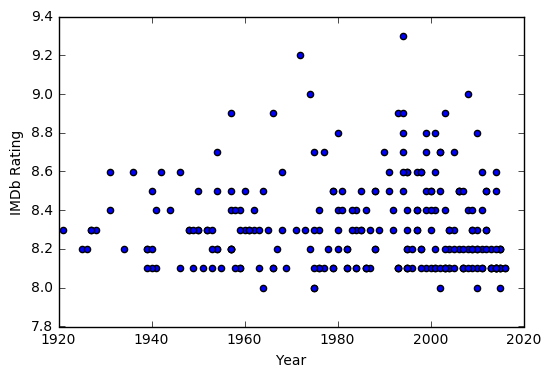

In [421]:
plt.scatter(df['Year'], df['imdbRating'])
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.xlim([1920, 2020])
plt.show()

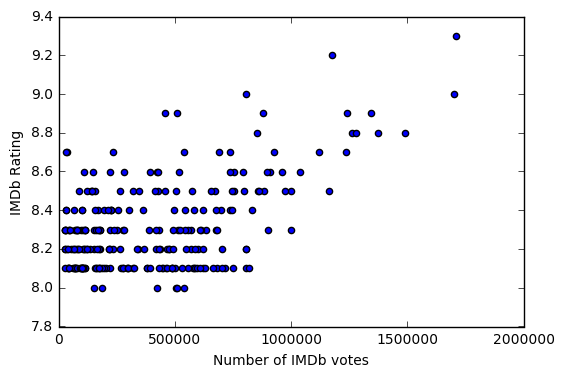

In [420]:
plt.scatter(df['imdbVotes'], df['imdbRating'])
plt.xlabel('Number of IMDb votes')
plt.ylabel('IMDb Rating')
plt.xlim([0, 2000000])
plt.show()

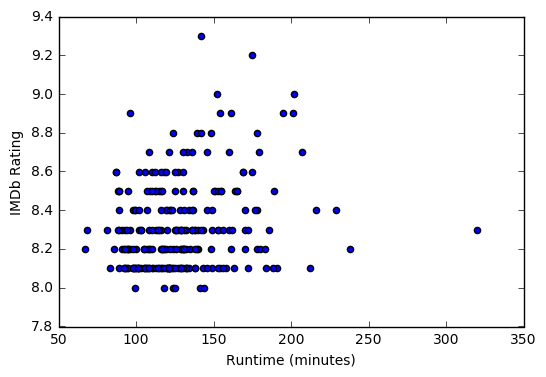

In [423]:
plt.scatter(df['Runtime'], df['imdbRating'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

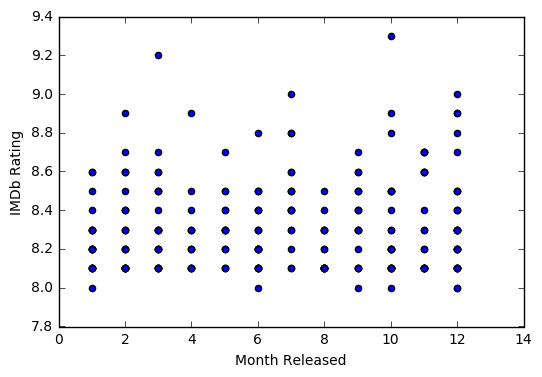

In [424]:
plt.scatter(df['Month'], df['imdbRating'])
plt.xlabel('Month Released')
plt.ylabel('IMDb Rating')
plt.show()

In [342]:
# A few numerical categories that I want to use for my model
dummies = df[['Title', 'is_high_rating', 'imdbVotes', 'Runtime', 'Year', 'Month']]
dummies.head()

,Title,is_high_rating,imdbVotes,Runtime,Year,Month
0,The Shawshank Redemption,1,1711064,142.0,1994,10.0
1,The Godfather,1,1177812,175.0,1972,3.0
2,The Godfather: Part II,1,807734,202.0,1974,12.0
3,The Dark Knight,1,1699835,152.0,2008,7.0
4,12 Angry Men,1,455987,96.0,1957,4.0


In [322]:
dummies.dtypes

Title              object
is_high_rating      int64
imdbVotes           int64
Runtime           float64
Year                int64
Month             float64
dtype: object

In [344]:
dummies[dummies['Month'].isnull()]

,Title,is_high_rating,imdbVotes,Runtime,Year,Month
132,The Gold Rush,0,69196,95.0,1925,NaN


In [346]:
# Found release month from https://en.wikipedia.org/wiki/The_Gold_Rush
dummies['Month'].fillna(6.0, inplace=True)

/home/nick/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [347]:
dummies.isnull().any()

Title             False
is_high_rating    False
imdbVotes         False
Runtime           False
Year              False
Month             False
dtype: bool

In [348]:
# I want to include the Genre, Director, and Actors in the model
# Creating dummies for Genre and Director

# for col in set(['Genre', 'Language', 'Director', 'Language', 'Country']):
for col in set(['Genre', 'Director']):
    dummies = dummies.join(df[col].str.get_dummies(sep=','))
    
dummies.head()

,Title,is_high_rating,imdbVotes,Runtime,Year,Month,Action,Adventure,Biography,Comedy,...,Victor Fleming,Vittorio De Sica,Wai-Keung Lau,Wes Anderson,William Wyler,Wilson Yip,Wolfgang Petersen,Woody Allen,Yasujirô Ozu,Çagan Irmak
0,The Shawshank Redemption,1,1711064,142.0,1994,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,1,1177812,175.0,1972,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,1,807734,202.0,1974,12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight,1,1699835,152.0,2008,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,1,455987,96.0,1957,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [349]:
# Now adding actors
# Doing this separately because there was overlap between actors and directors
dummies = dummies.join(df['Actors'].str.get_dummies(sep=','), lsuffix='_director', rsuffix='_actor')

In [350]:
dummies.shape

(250, 1083)

In [351]:
df['Rated'].value_counts()

R            105
PG            38
PG-13         32
NOT RATED     27
APPROVED      19
G             12
UNRATED        9
PASSED         5
M              1
Name: Rated, dtype: int64

In [352]:
# Including the Rating, I probably would have consolidated these if I had more time, since there are similar categories
dummies = dummies.join(pd.get_dummies(df['Rated']), rsuffix='_rating')
dummies.head()

,Title,is_high_rating,imdbVotes,Runtime,Year,Month,Action,Adventure,Biography,Comedy,...,Yves Montand,APPROVED,G,M,NOT RATED,PASSED,PG,PG-13,R,UNRATED
0,The Shawshank Redemption,1,1711064,142.0,1994,10.0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,The Godfather,1,1177812,175.0,1972,3.0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,The Godfather: Part II,1,807734,202.0,1974,12.0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,The Dark Knight,1,1699835,152.0,2008,7.0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,12 Angry Men,1,455987,96.0,1957,4.0,0,0,0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [353]:
dummies.shape

(250, 1092)

In [374]:
# Define X for model, drop title and rating (y)
X = dummies.drop(['Title', 'is_high_rating'], axis=1)
print X.shape
X.head()

(250, 1090)


,imdbVotes,Runtime,Year,Month,Action,Adventure,Biography,Comedy,Crime,Drama,...,Yves Montand,APPROVED,G,M,NOT RATED,PASSED,PG,PG-13,R,UNRATED
0,1711064,142.0,1994,10.0,0,0,0,0,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1177812,175.0,1972,3.0,0,0,0,0,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,807734,202.0,1974,12.0,0,0,0,0,0,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1699835,152.0,2008,7.0,0,0,0,0,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,455987,96.0,1957,4.0,0,0,0,0,0,1,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [377]:
X.isnull().any()

imdbVotes            False
Runtime              False
Year                 False
Month                False
 Action              False
 Adventure           False
 Biography           False
 Comedy              False
 Crime               False
 Drama               False
 Family              False
 Fantasy             False
 Film-Noir           False
 History             False
 Horror              False
 Music               False
 Musical             False
 Mystery             False
 Romance             False
 Sci-Fi              False
 Sport               False
 Thriller            False
 War                 False
 Western             False
Action               False
Adventure            False
Animation            False
Biography            False
Comedy               False
Crime                False
                     ...  
Tim Roth             False
Tom Berenger         False
Tom Hanks            False
Tom Hardy            False
Tom Skerritt         False
Tommy Lee Jones      False
T

In [378]:
# Define target variable
y = dummies['is_high_rating']
y.shape

(250,)

In [379]:
y.describe()

count    250.000000
mean       0.524000
std        0.500426
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: is_high_rating, dtype: float64

In [380]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [381]:
from sklearn.cross_validation import KFold

cv = KFold(len(df), n_folds=3, shuffle=True, random_state=42)

In [382]:
from sklearn.grid_search import GridSearchCV

# For most of these, I kinda have no idea what 'good' parameters to grid search over are
# I kinda guessed/took what I could find by googling
params = {
    'bagging_decision_tree': {"max_samples": [5, 10, 15],
                             "max_features": [1, 2, 3],
                             "bootstrap": [True, False]},
    'random_forest': {"n_estimators": [10, 100, 1000],
              "max_depth": [3, None],
              "max_features": [0.25, 0.5, 0.75, 1.0],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]},
    'extra_trees': {"criterion": ["gini", "entropy"],
                   "max_depth": [3, None],
                   "max_features": [0.25, 0.5, 0.75, 1.0],
                   "bootstrap": [True, False]},
    'adaboost': {"n_estimators": [10, 50, 100],
                "learning_rate": [1, 5, 10],
                "algorithm": ['SAMME', 'SAMME.R']},
    'gradient_boosting': {"n_estimators": [10, 100, 200],
                          "max_depth": [3, None],}
}

In [383]:
# params = {
#     'bagging_decision_tree': {},
#     'random_forest': {},
#     'extra_trees': {},
#     'adaboost': {},
#     'gradient_boosting': {}
# }

In [384]:
results = {}

def evaluate_model(X_train, X_test, y_train, y_test, model, model_name):
    grid = GridSearchCV(model, param_grid=params[model_name], cv=3)
    grid.fit(X_train, y_train)
    predictions = grid.predict(X_test)
    print 'Model tested:', model_name
    print grid.best_params_
    print grid.score(X_train, y_train)
    print grid.score(X_test, y_test)
    print pd.DataFrame(confusion_matrix(y_test, predictions), index=['predicted_high_rating', 'predicted_not_high_rating'], columns=['is_high_rating', 'not_high_rating'])
    print classification_report(y_test, predictions)
#     plt.scatter(y_test, predictions)
#     plt.xlabel('True Values')
#     plt.ylabel('Predictions')
#     plt.show()
    results.update({model_name: grid.score(X_test, y_test)})

In [385]:
# I tried Regressor models and they sucked :(

# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor

# brdt = BaggingRegressor(DecisionTreeRegressor())
# rfr = RandomForestRegressor(n_jobs=-1)
# etr = ExtraTreesRegressor(n_jobs=-1)
# adr = AdaBoostRegressor()
# gbr = GradientBoostingRegressor()

# models = {
#     'bagging_decision_tree': brdt,
#     'random_forest': rfr,
#     'extra_trees': etr,
#     'adaboost': adr,
#     'gradient_boosting': gbr
# }

In [386]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

bcdt = BaggingClassifier(DecisionTreeClassifier())
rfc = RandomForestClassifier(n_jobs=-1)
etc = ExtraTreesClassifier(n_jobs=-1)
adc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

models = {
    'bagging_decision_tree': bcdt,
    'random_forest': rfc,
    'extra_trees': etc,
    'adaboost': adc,
    'gradient_boosting': gbc
}

In [387]:
# Get the best grid searched model of each type

results = {}

for key, value in models.items():
    counter = 0
    evaluate_model(X_train, X_test, y_train, y_test, value, key)
    
print results

Model tested: gradient_boosting
{'n_estimators': 10, 'max_depth': 3}
0.813333333333
0.7
                           is_high_rating  not_high_rating
predicted_high_rating                  30               14
predicted_not_high_rating              16               40
             precision    recall  f1-score   support

          0       0.65      0.68      0.67        44
          1       0.74      0.71      0.73        56

avg / total       0.70      0.70      0.70       100

Model tested: adaboost
{'n_estimators': 100, 'learning_rate': 1, 'algorithm': 'SAMME'}
0.826666666667
0.73
                           is_high_rating  not_high_rating
predicted_high_rating                  31               13
predicted_not_high_rating              14               42
             precision    recall  f1-score   support

          0       0.69      0.70      0.70        44
          1       0.76      0.75      0.76        56

avg / total       0.73      0.73      0.73       100

Model tested: random_

In [440]:
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.columns = ['Model', 'Best GridSearchCV Score']
results_df

,Model,Best GridSearchCV Score
0,bagging_decision_tree,0.56
1,extra_trees,0.63
2,gradient_boosting,0.70
3,random_forest,0.67
4,adaboost,0.73


In [401]:
# fit best random forest model to the whole train set based on grid search parameters above
best_random_forest = RandomForestClassifier(max_features=0.25, n_estimators=100, bootstrap=False, criterion='entropy', max_depth=None)

In [413]:
best_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=0.25,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [402]:
# fit best Adaboost model to the whole train set based on grid search parameters above
best_adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1, algorithm='SAMME')

In [403]:
# The best overall model was the Adaboost model
best_model = best_adaboost.fit(X_train, y_train)

In [404]:
best_predictions = best_model.predict(X_test)

In [405]:
print best_model.score(X_test, y_test)
best_confusion = pd.DataFrame(confusion_matrix(y_test, best_predictions), index=['predicted_high_rating', 'predicted_not_high_rating'], columns=['is_high_rating', 'not_high_rating'])
best_confusion

0.73


,is_high_rating,not_high_rating
predicted_high_rating,31,13
predicted_not_high_rating,14,42


In [406]:
print classification_report(y_test, best_predictions)

             precision    recall  f1-score   support

          0       0.69      0.70      0.70        44
          1       0.76      0.75      0.76        56

avg / total       0.73      0.73      0.73       100



In [414]:
from sklearn import tree
i_tree = 0
for tree_in_forest in best_random_forest.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
    i_tree = i_tree + 1

In [415]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz


# dot_data = StringIO()  
# export_graphviz(best_random_forest, out_file=dot_data,  
#                     feature_names=X_train.columns,  
#                     class_names=y_train,  
#                     filled=True, rounded=True,
#                     proportion=True,
#                     special_characters=True)  
# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())  

In [417]:
# import pydot
# (graph) = pydot.graph_from_dot_file('tree_1.dot')
# graph.write_png('tree_1.png')
# graph.draw('tree_1.png')

#### For fun, here's a tree image I made from following the discussion you had with Chris in Slack. I kinda have no idea if this is actually useful or not.

![](tree_1.png)

### Write-up Blog Post
http://nick-dsi.blogspot.com/2016/11/project-6-apis-random-forests.html